Welcome to JupyROOT 6.08/05

Confusion matrix

Example of confusion matrix usage to evaluate the quality
of the output of a classifier on the iris data set. The
diagonal elements represent the number of points for which
the predicted label is equal to the true label, while
off-diagonal elements are those that are mislabeled by the
classifier. The higher the diagonal values of the confusion
matrix the better, indicating many correct predictions.

The figures show the confusion matrix with and without
normalization by class support size (number of elements
in each class). This kind of normalization can be
interesting in case of class imbalance to have a more
visual interpretation of which class is being misclassified.

Here the results are not as good as they could be as our
choice for the regularization parameter C was not the best.
In real life applications this parameter is usually chosen
using :ref:`grid_search`.


Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0 

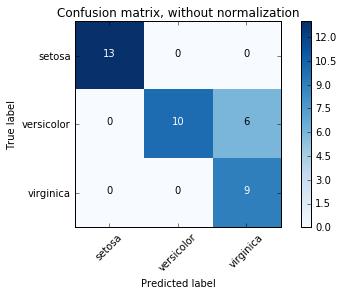

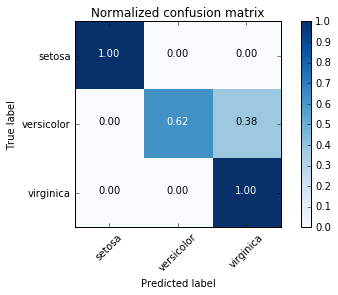

In [1]:
from ROOT import TFile
from root_numpy import tree2array
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics, preprocessing
from plot_confusion_matrix import plot_confusion_matrix
import copy

In [2]:
fileWW = TFile("out_WWall.root", "READ")
fileZZ = TFile("out_ZZall.root", "READ")
fileHH = TFile("out_HHall.root", "READ")
fileTT = TFile("out_TTall.root", "READ")
fileJJ = TFile("out_QCDall.root", "READ")
fileBB = TFile("out_BBall.root", "READ")
treeWW = fileWW.Get("jetTree")
treeZZ = fileZZ.Get("jetTree")
treeHH = fileHH.Get("jetTree")
treeTT = fileTT.Get("jetTree")
treeJJ = fileJJ.Get("jetTree")
treeBB = fileBB.Get("jetTree")

In [3]:
vars = []
for branch in treeWW.GetListOfBranches():
    name = branch.GetName()
    if 'Njets' in name:
        continue
    if 'target' in name:
        continue
    if 'NNout' in name:
        continue
    if 'sum' in name:
        continue
    if 'gen' in name:
        continue
    if 'flatten' in name:
        continue
    if 'dist' in name:
        continue
    if 'npv' in name:
        continue
    if 'sorting' in name:
        continue
    if name == 'mass':
        continue
    if name == 'minDist':
        continue
    if 'et' in name:
        continue
    vars.append(name)
print vars

['SDmass', 'tau32', 'tau21', 'h1_top', 'h2_top', 'h3_top', 'h4_top', 'isotropy_top', 'aplanarity_top', 'sphericity_top', 'thrust_top', 'h1_W', 'h2_W', 'h3_W', 'h4_W', 'isotropy_W', 'aplanarity_W', 'sphericity_W', 'thrust_W', 'h1_Z', 'h2_Z', 'h3_Z', 'h4_Z', 'isotropy_Z', 'aplanarity_Z', 'sphericity_Z', 'thrust_Z', 'h1_H', 'h2_H', 'h3_H', 'h4_H', 'isotropy_H', 'aplanarity_H', 'sphericity_H', 'thrust_H', 'bDisc', 'bDisc1', 'bDisc2', 'q', 'm12_W', 'm13_W', 'm23_W', 'm1234_W', 'm12_Z', 'm13_Z', 'm23_Z', 'm1234_Z', 'm12_top', 'm13_top', 'm23_top', 'm1234_top', 'm12_H', 'm13_H', 'm23_H', 'm1234_H', 'PzOverP_top', 'PzOverP_W', 'PzOverP_Z', 'PzOverP_H']


In [4]:
sel = "tau32 < 9999. && et > 500. && et < 2500. && bDisc1 > -0.05 && SDmass < 400"
treeVars = vars
arrayWW = tree2array(treeWW, treeVars, sel)
arrayZZ = tree2array(treeZZ, treeVars, sel)
arrayHH = tree2array(treeHH, treeVars, sel)
arrayTT = tree2array(treeTT, treeVars, sel)
arrayJJ = tree2array(treeJJ, treeVars, sel)
arrayBB = tree2array(treeBB, treeVars, sel)

In [5]:
newArrayWW = []
newArrayZZ = []
newArrayHH = []
newArrayTT = []
newArrayJJ = []
newArrayBB = []
for entry in arrayWW[:]:
    a = list(entry)
    newArrayWW.append(a)
for entry in arrayZZ[:]:
    a = list(entry)
    newArrayZZ.append(a)
for entry in arrayHH[:]:
    a = list(entry)
    newArrayHH.append(a)
for entry in arrayTT[:]:
    a = list(entry)
    newArrayTT.append(a)
for entry in arrayJJ[:]:
    a = list(entry)
    newArrayJJ.append(a)
for entry in arrayBB[:]:
    a = list(entry)
    newArrayBB.append(a)
arrayWW = copy.copy(newArrayWW)
arrayZZ = copy.copy(newArrayZZ)
arrayHH = copy.copy(newArrayHH)
arrayTT = copy.copy(newArrayTT)
arrayJJ = copy.copy(newArrayJJ)
arrayBB = copy.copy(newArrayBB)




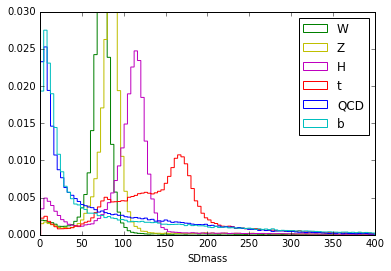

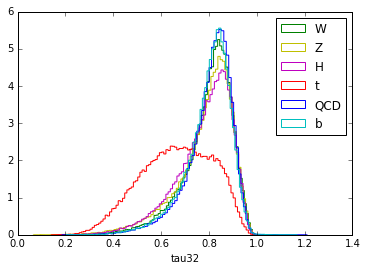

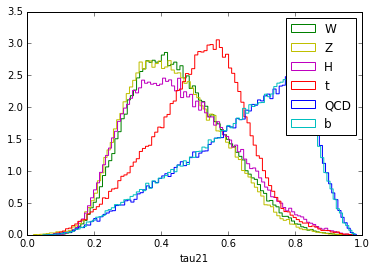

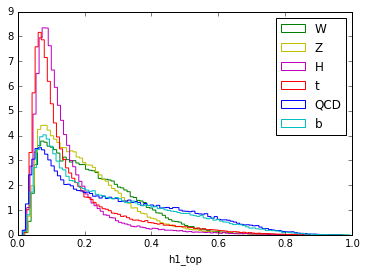

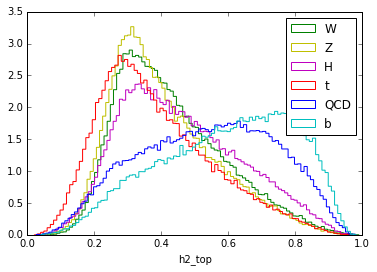

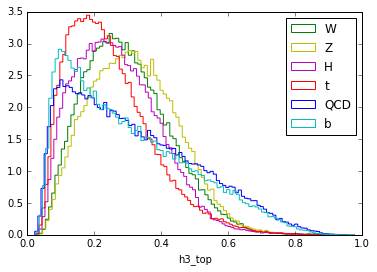

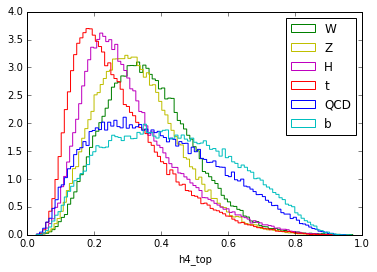

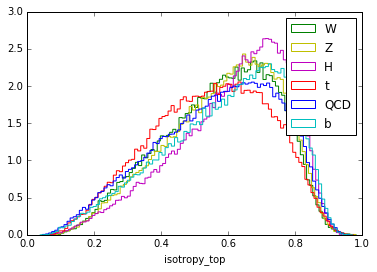

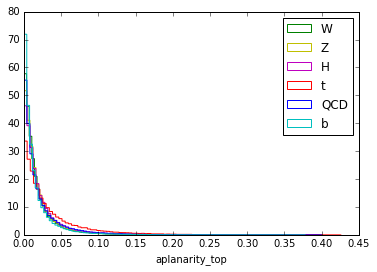

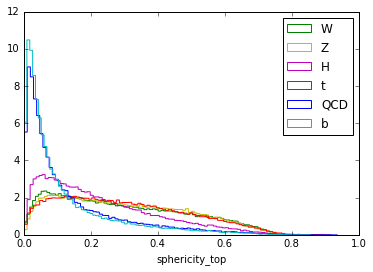

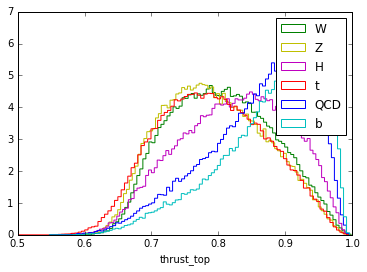

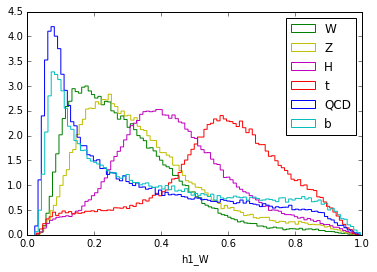

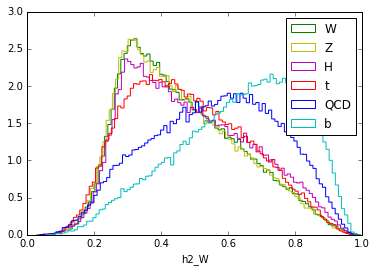

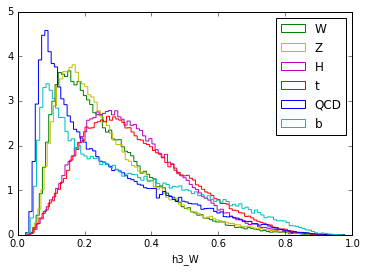

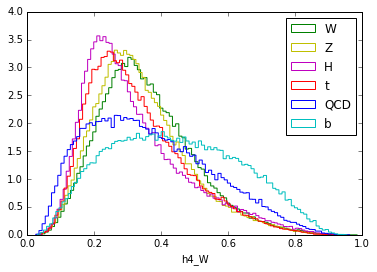

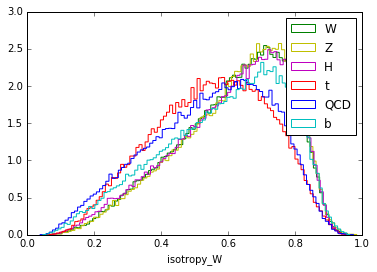

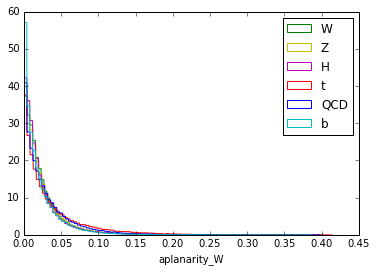

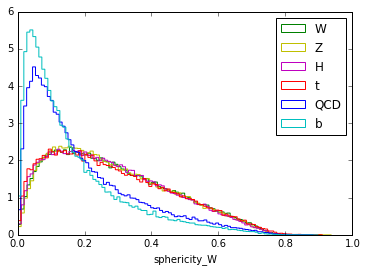

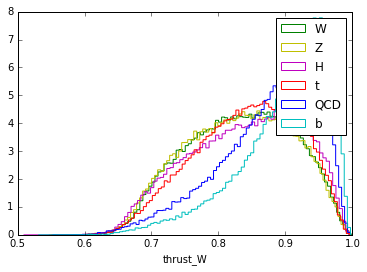

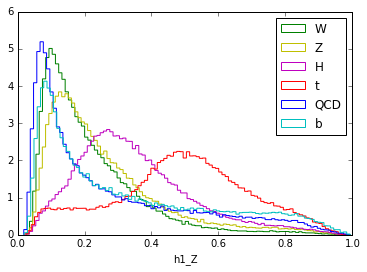

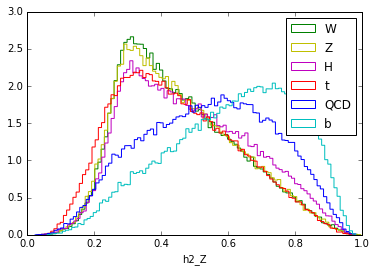

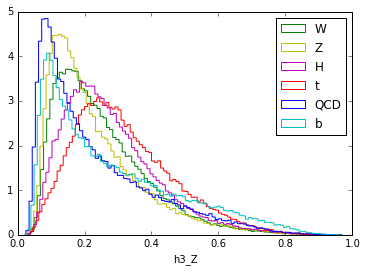

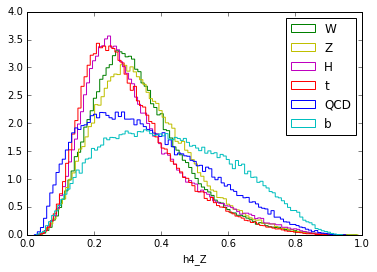

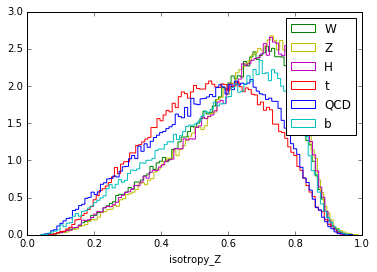

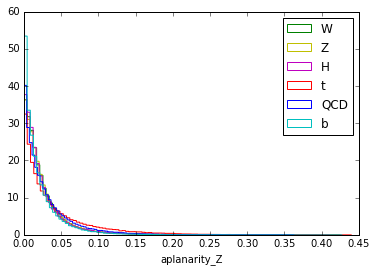

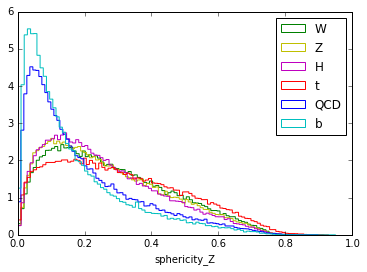

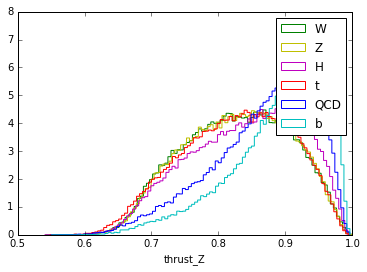

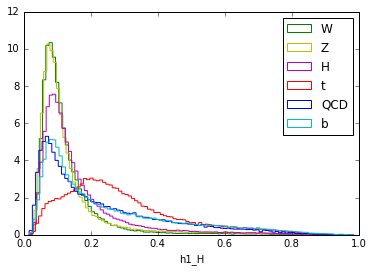

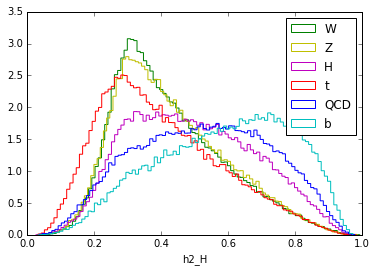

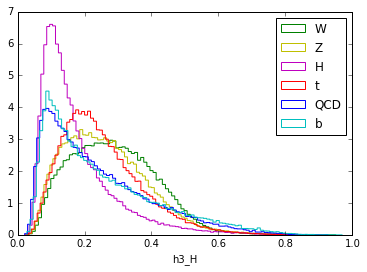

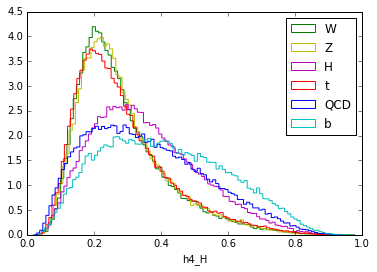

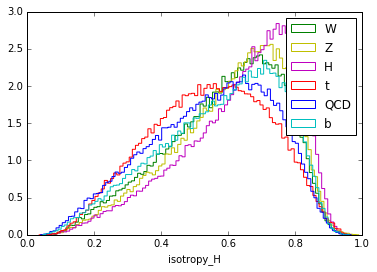

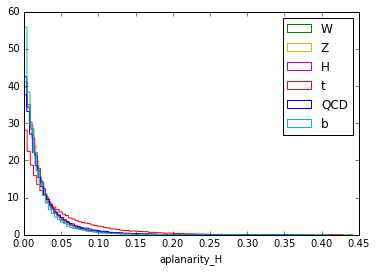

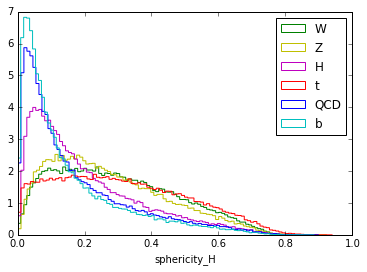

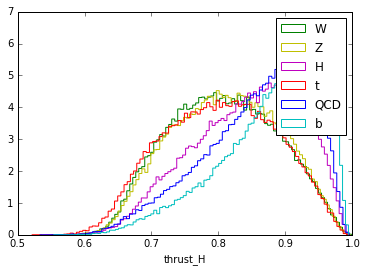

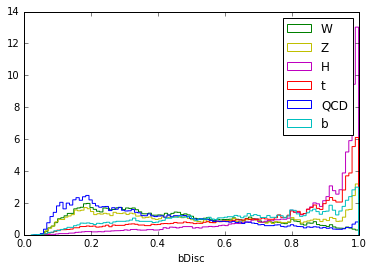

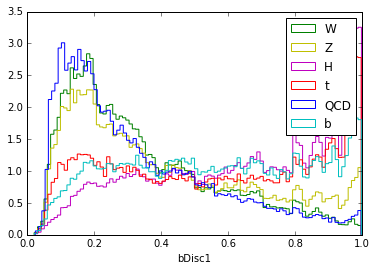

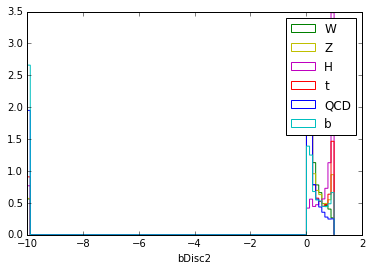

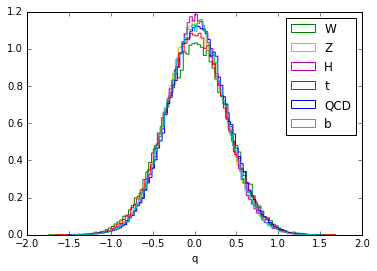

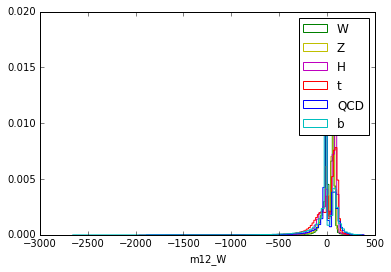

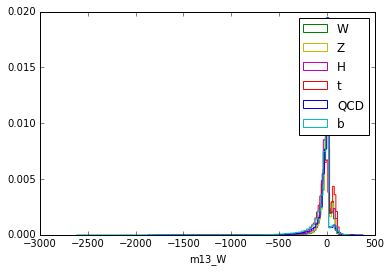

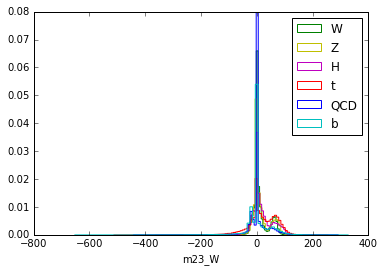

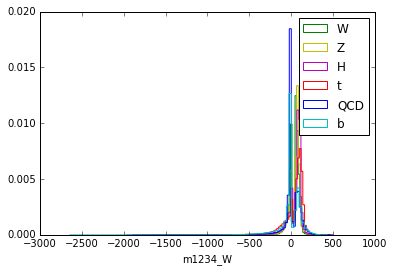

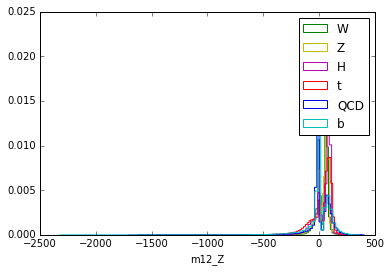

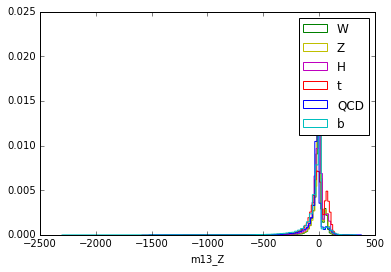

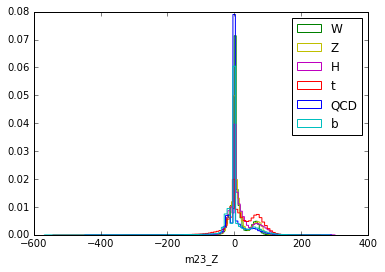

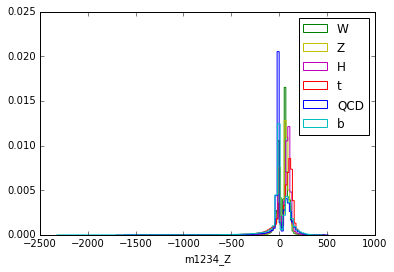

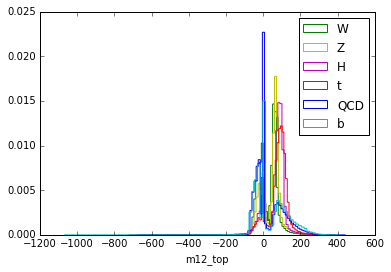

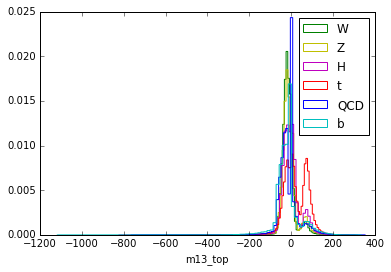

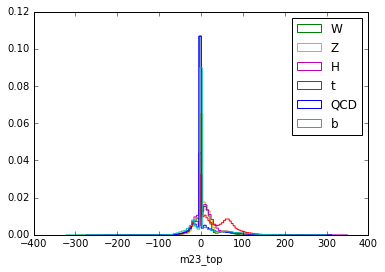

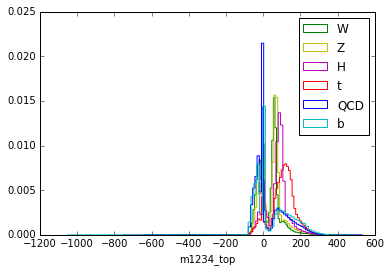

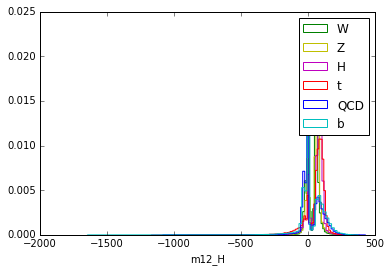

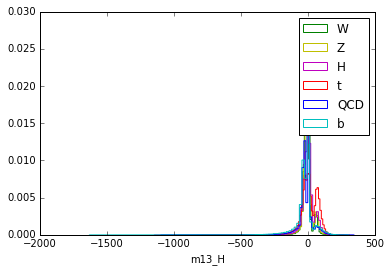

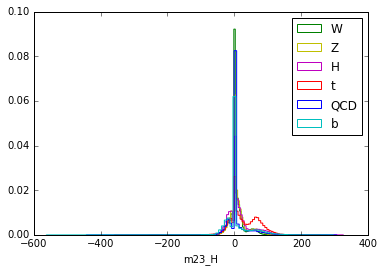

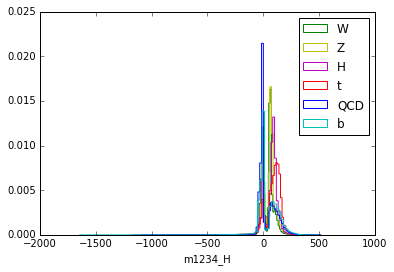

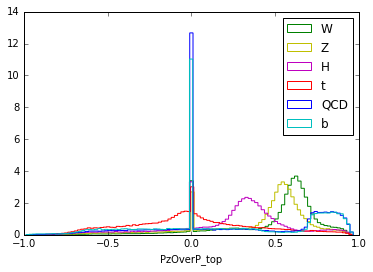

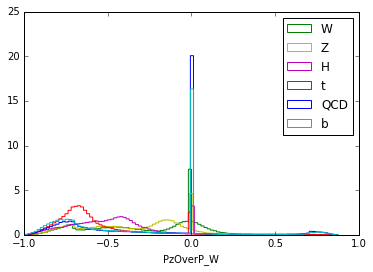

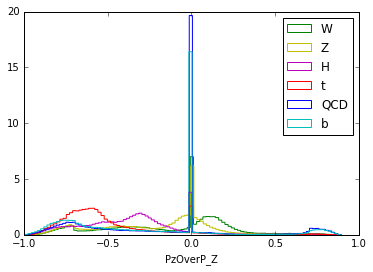

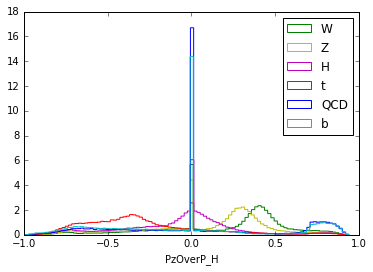

In [6]:
histsWW = np.array(arrayWW).T
histsZZ = np.array(arrayZZ).T
histsHH = np.array(arrayHH).T
histsTT = np.array(arrayTT).T
histsJJ = np.array(arrayJJ).T
histsBB = np.array(arrayBB).T


for index, hist in enumerate(histsWW):
    plt.figure()
    plt.hist(hist, bins=100, color='g', label='W', histtype='step', normed=True)
    plt.hist(histsZZ[index], bins=100, color='y', label='Z', histtype='step', normed=True)
    plt.hist(histsHH[index], bins=100, color='m', label='H', histtype='step', normed=True)
    plt.hist(histsTT[index], bins=100, color='r', label='t', histtype='step', normed=True)
    plt.hist(histsJJ[index], bins=100, color='b', label='QCD', histtype='step', normed=True)
    plt.hist(histsBB[index], bins=100, color='c', label='b', histtype='step', normed=True)
    plt.xlabel(vars[index])
    plt.legend()
    plt.show()
    plt.close()

In [7]:
#randomize dataset
import random

trainData = []
targetData = []
nEvents = len(newArrayWW) + len(newArrayZZ) + len(newArrayHH) + len(newArrayTT) + len(newArrayJJ) + len(newArrayBB)
print nEvents
while nEvents > 0:
    rng = random.randint(0,5)
    if (rng == 0 and len(newArrayJJ) > 0):
        trainData.append(newArrayJJ.pop())
        targetData.append(0)
        nEvents = nEvents -1
    if (rng == 1 and len(newArrayWW) > 0):
        trainData.append(newArrayWW.pop())
        targetData.append(1)
        nEvents = nEvents - 1
    if (rng == 2 and len(newArrayZZ) > 0):
        trainData.append(newArrayZZ.pop())
        targetData.append(2)
        nEvents = nEvents - 1
    if (rng == 3 and len(newArrayHH) > 0):
        trainData.append(newArrayHH.pop())
        targetData.append(3)
        nEvents = nEvents - 1
    if (rng == 4 and len(newArrayTT) > 0):
        trainData.append(newArrayTT.pop())
        targetData.append(4)
        nEvents = nEvents - 1
    if (rng == 5 and len(newArrayBB) > 0):
        trainData.append(newArrayBB.pop())
        targetData.append(5)
        nEvents = nEvents - 1

553425


In [8]:
#standardize dataset
scaler = preprocessing.StandardScaler().fit(trainData)
trainData = scaler.transform(trainData)
arrayTT = scaler.transform(arrayTT)
arrayWW = scaler.transform(arrayWW)
arrayZZ = scaler.transform(arrayZZ)
arrayHH = scaler.transform(arrayHH)
arrayJJ = scaler.transform(arrayJJ)
arrayBB = scaler.transform(arrayBB)

In [9]:
numTrain = 500000

In [10]:
from sklearn import neural_network
from sklearn.linear_model import SGDClassifier
from sklearn import tree
mlp = neural_network.MLPClassifier(hidden_layer_sizes=(40,40,40), verbose=True, activation='relu')
#mlp = tree.DecisionTreeClassifier()
mlp.fit(trainData[:numTrain], targetData[:numTrain])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(40, 40, 40), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

Iteration 1, loss = 1.10727151
Iteration 2, loss = 1.03102891
Iteration 3, loss = 1.00870910
Iteration 4, loss = 0.99508086
Iteration 5, loss = 0.98574117
Iteration 6, loss = 0.97964051
Iteration 7, loss = 0.97464191
Iteration 8, loss = 0.97154481
Iteration 9, loss = 0.96863672
Iteration 10, loss = 0.96621098
Iteration 11, loss = 0.96450669
Iteration 12, loss = 0.96273575
Iteration 13, loss = 0.96107732
Iteration 14, loss = 0.95976525
Iteration 15, loss = 0.95849033
Iteration 16, loss = 0.95730759
Iteration 17, loss = 0.95632133
Iteration 18, loss = 0.95527599
Iteration 19, loss = 0.95466492
Iteration 20, loss = 0.95368391
Iteration 21, loss = 0.95270462
Iteration 22, loss = 0.95169455
Iteration 23, loss = 0.95133040
Iteration 24, loss = 0.95091972
Iteration 25, loss = 0.94975305
Iteration 26, loss = 0.94941355
Iteration 27, loss = 0.94906945
Iteration 28, loss = 0.94848913
Iteration 29, loss = 0.94778082
Iteration 30, loss = 0.94753080
Iteration 31, loss = 0.94693889
Iteration 32, los

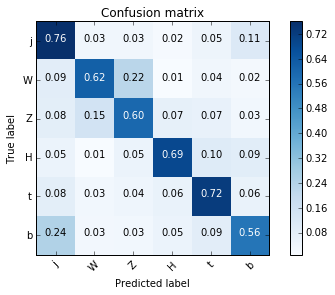

Normalized confusion matrix
[[ 0.76  0.03  0.03  0.02  0.05  0.11]
 [ 0.09  0.62  0.22  0.01  0.04  0.02]
 [ 0.08  0.15  0.6   0.07  0.07  0.03]
 [ 0.05  0.01  0.05  0.69  0.1   0.09]
 [ 0.08  0.03  0.04  0.06  0.72  0.06]
 [ 0.24  0.03  0.03  0.05  0.09  0.56]]


In [11]:
cm = metrics.confusion_matrix(mlp.predict(trainData[400000:]), targetData[400000:])
plt.figure()
targetNames = ['j', 'W', 'Z', 'H', 't', 'b']
plot_confusion_matrix(cm.T, targetNames, normalize=True)
plt.savefig('confusion.pdf')
plt.show()


In [12]:
print mlp.score(trainData[400000:], targetData[400000:])


0.481961651592


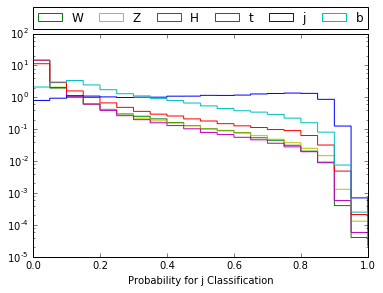

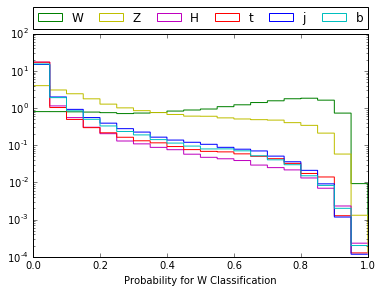

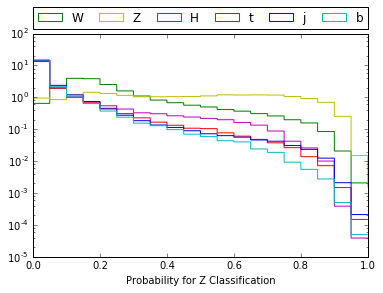

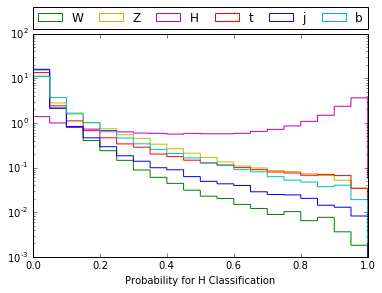

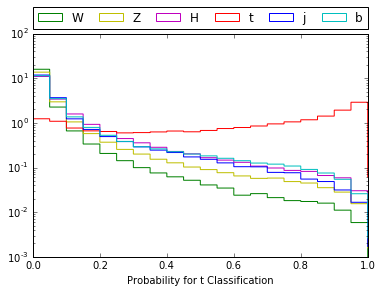

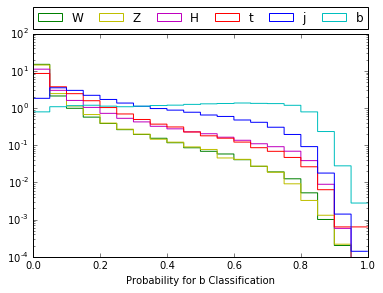

In [12]:
probsTT = mlp.predict_proba(arrayTT)
probsWW = mlp.predict_proba(arrayWW)
probsZZ = mlp.predict_proba(arrayZZ)
probsHH = mlp.predict_proba(arrayHH)
probsJJ = mlp.predict_proba(arrayJJ)
probsBB = mlp.predict_proba(arrayBB)
probs = [probsJJ, probsWW, probsZZ, probsHH, probsTT, probsBB]




plt.close()
plt.figure()
plt.xlabel('Probability for j Classification')
plt.hist(probsWW.T[0], bins=20, range=(0,1), label='W', color='g', histtype='step',normed=True, log=True)
plt.hist(probsZZ.T[0], bins=20, range=(0,1), label='Z', color='y', histtype='step',normed=True, log=True)
plt.hist(probsHH.T[0], bins=20, range=(0,1), label='H', color='m', histtype='step',normed=True, log=True)
plt.hist(probsTT.T[0], bins=20, range=(0,1), label='t', color='r', histtype='step',normed=True, log=True)
plt.hist(probsJJ.T[0], bins=20, range=(0,1), label='j', color='b', histtype='step',normed=True, log=True)
plt.hist(probsBB.T[0], bins=20, range=(0,1), label='b', color='c', histtype='step',normed=True, log=True)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=6, mode="expand", borderaxespad=0.)
plt.savefig('prob_j.pdf')
plt.show()


plt.xlabel('Probability for W Classification')
plt.hist(probsWW.T[1], bins=20, range=(0,1), label='W', color='g', histtype='step',normed=True, log=True)
plt.hist(probsZZ.T[1], bins=20, range=(0,1), label='Z', color='y', histtype='step',normed=True, log=True)
plt.hist(probsHH.T[1], bins=20, range=(0,1), label='H', color='m', histtype='step',normed=True, log=True)
plt.hist(probsTT.T[1], bins=20, range=(0,1), label='t', color='r', histtype='step',normed=True, log=True)
plt.hist(probsJJ.T[1], bins=20, range=(0,1), label='j', color='b', histtype='step',normed=True, log=True)
plt.hist(probsBB.T[1], bins=20, range=(0,1), label='b', color='c', histtype='step',normed=True, log=True)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=6, mode="expand", borderaxespad=0.)
plt.savefig('prob_W.pdf')
plt.show()


plt.xlabel('Probability for Z Classification')
plt.hist(probsWW.T[2], bins=20, range=(0,1), label='W', color='g', histtype='step',normed=True, log=True)
plt.hist(probsZZ.T[2], bins=20, range=(0,1), label='Z', color='y', histtype='step',normed=True, log=True)
plt.hist(probsHH.T[2], bins=20, range=(0,1), label='H', color='m', histtype='step',normed=True, log=True)
plt.hist(probsTT.T[2], bins=20, range=(0,1), label='t', color='r', histtype='step',normed=True, log=True)
plt.hist(probsJJ.T[2], bins=20, range=(0,1), label='j', color='b', histtype='step',normed=True, log=True)
plt.hist(probsBB.T[2], bins=20, range=(0,1), label='b', color='c', histtype='step',normed=True, log=True)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=6, mode="expand", borderaxespad=0.)
plt.savefig('prob_Z.pdf')
plt.show()


plt.xlabel('Probability for H Classification')
plt.hist(probsWW.T[3], bins=20, range=(0,1), label='W', color='g', histtype='step',normed=True, log=True)
plt.hist(probsZZ.T[3], bins=20, range=(0,1), label='Z', color='y', histtype='step',normed=True, log=True)
plt.hist(probsHH.T[3], bins=20, range=(0,1), label='H', color='m', histtype='step',normed=True, log=True)
plt.hist(probsTT.T[3], bins=20, range=(0,1), label='t', color='r', histtype='step',normed=True, log=True)
plt.hist(probsJJ.T[3], bins=20, range=(0,1), label='j', color='b', histtype='step',normed=True, log=True)
plt.hist(probsBB.T[3], bins=20, range=(0,1), label='b', color='c', histtype='step',normed=True, log=True)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=6, mode="expand", borderaxespad=0.)
plt.savefig('prob_H.pdf')
plt.show()


plt.xlabel('Probability for t Classification')
plt.hist(probsWW.T[4], bins=20, range=(0,1), label='W', color='g', histtype='step',normed=True, log=True)
plt.hist(probsZZ.T[4], bins=20, range=(0,1), label='Z', color='y', histtype='step',normed=True, log=True)
plt.hist(probsHH.T[4], bins=20, range=(0,1), label='H', color='m', histtype='step',normed=True, log=True)
plt.hist(probsTT.T[4], bins=20, range=(0,1), label='t', color='r', histtype='step',normed=True, log=True)
plt.hist(probsJJ.T[4], bins=20, range=(0,1), label='j', color='b', histtype='step',normed=True, log=True)
plt.hist(probsBB.T[4], bins=20, range=(0,1), label='b', color='c', histtype='step',normed=True, log=True)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=6, mode="expand", borderaxespad=0.)
plt.savefig('prob_t.pdf')
plt.show()


plt.xlabel('Probability for b Classification')
plt.hist(probsWW.T[5], bins=20, range=(0,1), label='W', color='g', histtype='step',normed=True, log=True)
plt.hist(probsZZ.T[5], bins=20, range=(0,1), label='Z', color='y', histtype='step',normed=True, log=True)
plt.hist(probsHH.T[5], bins=20, range=(0,1), label='H', color='m', histtype='step',normed=True, log=True)
plt.hist(probsTT.T[5], bins=20, range=(0,1), label='t', color='r', histtype='step',normed=True, log=True)
plt.hist(probsJJ.T[5], bins=20, range=(0,1), label='j', color='b', histtype='step',normed=True, log=True)
plt.hist(probsBB.T[5], bins=20, range=(0,1), label='b', color='c', histtype='step',normed=True, log=True)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=6, mode="expand", borderaxespad=0.)
plt.savefig('prob_b.pdf')
plt.show()




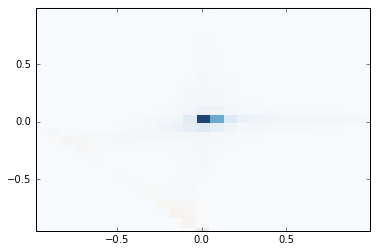

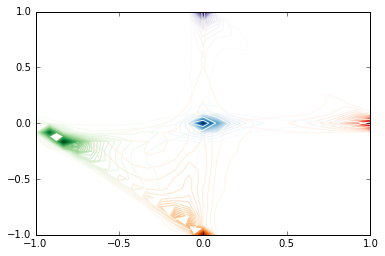

In [31]:
x_T = probsTT.T[4] - probsTT.T[1]
y_T = probsTT.T[3] - probsTT.T[2]

x_H = probsHH.T[4] - probsHH.T[1]
y_H = probsHH.T[3] - probsHH.T[2]

x_W = probsWW.T[4] - probsWW.T[1]
y_W = probsWW.T[3] - probsWW.T[2]

x_Z = probsZZ.T[4] - probsZZ.T[1]
y_Z = probsZZ.T[3] - probsZZ.T[2]

x_J = probsJJ.T[4] - probsJJ.T[1]
y_J = probsJJ.T[3] - probsJJ.T[2]

plt.figure()
countsT,ybins,xbins,image = plt.hist2d(x_T,y_T, (25,25),cmap='Reds',alpha=0.9,normed=True)
#plt.colorbar()
countsH,ybins,xbins,image = plt.hist2d(x_H,y_H, (25,25),cmap='Purples',alpha=0.9,normed=True)
#plt.colorbar()
countsW,ybins,xbins,image = plt.hist2d(x_W,y_W, (25,25),cmap='Greens',alpha=0.9,normed=True)
#plt.colorbar()
countsZ,ybins,xbins,image = plt.hist2d(x_Z,y_Z, (25,25),cmap='Oranges',alpha=0.9,normed=True)
#plt.colorbar()
countsJ,ybins,xbins,image = plt.hist2d(x_J,y_J, (25,25),cmap='Blues',alpha=0.9,normed=True)
#plt.colorbar()
plt.show()




plt.figure()
plt.contour(countsT.transpose(),50,extent=[-1.0,1.0,-1.0,1.0], linewidths=1, cmap='Reds')

plt.contour(countsH.transpose(),50,extent=[-1.0,1.0,-1.0,1.0], linewidths=1, cmap ='Purples')

plt.contour(countsZ.transpose(),50, extent=[-1.0,1.0,-1.0,1.0], linewidths=1, cmap ='Oranges')

plt.contour(countsJ.transpose(),50,extent=[-1.0,1.0,-1.0,1.0], linewidths=1, cmap ='Blues')
plt.contour(countsW.transpose(),50,extent=[-1.0,1.0,-1.0,1.0], linewidths=1, cmap ='Greens')


plt.savefig('fived.pdf')

plt.show()


In [13]:
probsTT_bin = copy.copy(probsTT)
probsJJ_Tbin = copy.copy(probsJJ)
probsJJ_Wbin = copy.copy(probsJJ)
probsJJ_Zbin = copy.copy(probsJJ)
probsJJ_Hbin = copy.copy(probsJJ)
probsJJ_Bbin = copy.copy(probsJJ)
probsWW_bin = copy.copy(probsWW)
probsZZ_bin = copy.copy(probsZZ)
probsHH_bin = copy.copy(probsHH)
probsBB_bin = copy.copy(probsBB)
for entry in probsTT_bin:
    #print entry
    entry[0] = entry[0] / (entry[0]+entry[4])
    entry[1] = 0.0
    entry[2] = 0.0
    entry[3] = 0.0
    entry[4] = entry[4] / (entry[0]+entry[4])
    entry[5] = 0.0
for entry in probsWW_bin:
    #print entry
    entry[0] = entry[0] / (entry[0]+entry[1])
    entry[1] = entry[1] / (entry[0]+entry[1])
    entry[2] = 0.0
    entry[3] = 0.0
    entry[4] = 0.0
    entry[5] = 0.0
for entry in probsZZ_bin:
    #print entry
    entry[0] = entry[0] / (entry[0]+entry[2])
    entry[1] = 0.0
    entry[2] = entry[2] / (entry[0]+entry[2])
    entry[3] = 0.0
    entry[4] = 0.0
    entry[5] = 0.0
for entry in probsHH_bin:
    #print entry
    entry[0] = entry[0] / (entry[0]+entry[3])
    entry[1] = 0.0
    entry[2] = 0.0
    entry[3] = entry[3] / (entry[0]+entry[3])
    entry[4] = 0.0
    entry[5] = 0.0
for entry in probsBB_bin:
    entry[0] = entry[0] / (entry[0]+entry[5])
    entry[1] = 0.0
    entry[2] = 0.0
    entry[3] = 0.0
    entry[4] = 0.0
    entry[5] = entry[5] / (entry[0]+entry[5])
for entry in probsJJ_Tbin:
    #print entry
    entry[0] = entry[0] / (entry[0]+entry[4])
    entry[1] = 0.0
    entry[2] = 0.0
    entry[3] = 0.0
    entry[4] = entry[4] / (entry[0]+entry[4])
    entry[5] = 0.0
for entry in probsJJ_Wbin:
    #print entry
    entry[0] = entry[0] / (entry[0]+entry[1])
    entry[1] = entry[1] / (entry[0]+entry[1]) 
    entry[2] = 0.0
    entry[3] = 0.0
    entry[4] = 0.0
    entry[5] = 0.0
for entry in probsJJ_Zbin:
    #print entry
    entry[0] = entry[0] / (entry[0]+entry[2])
    entry[1] = 0.0
    entry[2] = entry[2] / (entry[0]+entry[2])
    entry[3] = 0.0
    entry[4] = 0.0  
    entry[5] = 0.0
for entry in probsJJ_Hbin:
    #print entry
    entry[0] = entry[0] / (entry[0]+entry[3])
    entry[1] = 0.0
    entry[2] = 0.0
    entry[3] = entry[3] / (entry[0]+entry[3])
    entry[4] = 0.0 
    entry[5] = 0.0
for entry in probsJJ_Bbin:
    #print entry
    entry[0] = entry[0] / (entry[0]+entry[5])
    entry[1] = 0.0
    entry[2] = 0.0
    entry[3] = 0.0
    entry[4] = 0.0
    entry[5] = entry[5] / (entry[0]+entry[5])

In [14]:
truthJJ = np.array([0]*len(arrayJJ))
truthWW = np.array([1]*len(arrayWW))
truthZZ = np.array([2]*len(arrayZZ))
truthHH = np.array([3]*len(arrayHH))
truthTT = np.array([4]*len(arrayTT))
truthBB = np.array([5]*len(arrayBB))
truth = [truthJJ, truthWW, truthZZ, truthHH, truthTT, truthBB]
probsJJ_bin = [None, probsJJ_Wbin, probsJJ_Zbin, probsJJ_Hbin, probsJJ_Tbin, probsJJ_Bbin]
probs_bin = [None, probsWW_bin, probsZZ_bin, probsHH_bin, probsTT_bin, probsBB_bin]

In [15]:
sig_label = 4
bkg_label = 0

In [16]:
from sklearn.metrics import roc_curve
rocCurves = {}
rocCurves_bin = {}
for sig_label in [1,2,3,4,5]:
    rocCurves[sig_label] = roc_curve(np.concatenate([truth[bkg_label],truth[sig_label]]), np.concatenate([probs[bkg_label].T[sig_label],probs[sig_label].T[sig_label]]), pos_label=sig_label)
    rocCurves_bin[sig_label] = roc_curve(np.concatenate([truth[bkg_label],truth[sig_label]]), np.concatenate([probsJJ_bin[sig_label].T[sig_label],probs_bin[sig_label].T[sig_label]]), pos_label=sig_label)

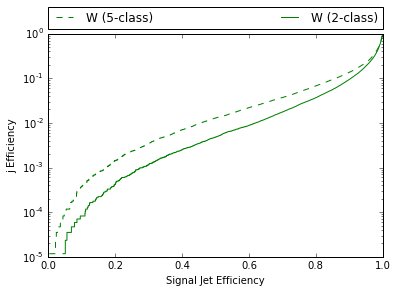

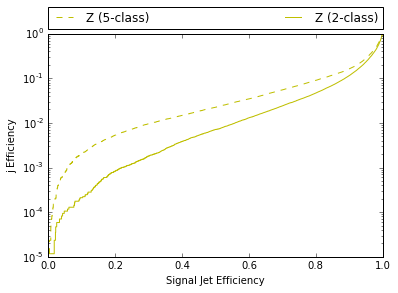

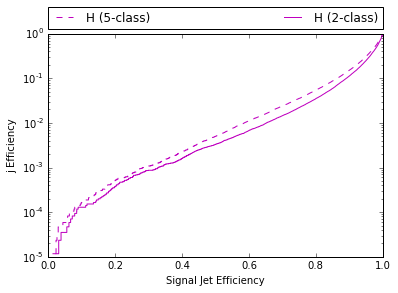

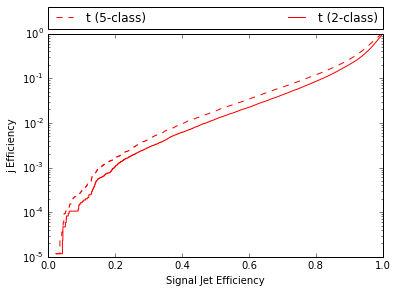

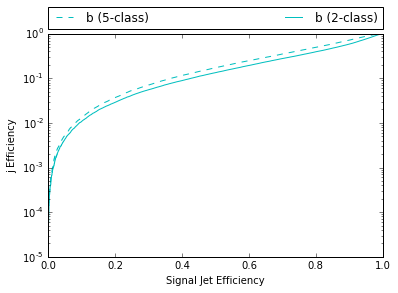

In [17]:
plt.figure()
plt.semilogy(rocCurves[1][1], rocCurves[1][0], color='g', label='W (5-class)', ls = '--')
plt.semilogy(rocCurves_bin[1][1], rocCurves_bin[1][0], color='g', label='W (2-class)')
plt.xlim([0.0,1.0])
plt.ylim([0.00001,1.0])
plt.ylabel(targetNames[bkg_label]+' Efficiency')
plt.xlabel('Signal Jet Efficiency')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0.)
plt.savefig('roc_W.pdf')
plt.show()

plt.figure()
plt.semilogy(rocCurves[2][1], rocCurves[2][0], color='y', label='Z (5-class)', ls='--')
plt.semilogy(rocCurves_bin[2][1], rocCurves_bin[2][0], color='y', label='Z (2-class)')
plt.xlim([0.0,1.0])
plt.ylim([0.00001,1.0])
plt.ylabel(targetNames[bkg_label]+' Efficiency')
plt.xlabel('Signal Jet Efficiency')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0.)
plt.savefig('roc_Z.pdf')
plt.show()

plt.figure()
plt.semilogy(rocCurves[3][1], rocCurves[3][0], color='m', label='H (5-class)', ls='--')
plt.semilogy(rocCurves_bin[3][1], rocCurves_bin[3][0], color='m', label='H (2-class)')
plt.xlim([0.0,1.0])
plt.ylim([0.00001,1.0])
plt.ylabel(targetNames[bkg_label]+' Efficiency')
plt.xlabel('Signal Jet Efficiency')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0.)
plt.savefig('roc_H.pdf')
plt.show()

plt.figure()
plt.semilogy(rocCurves[4][1], rocCurves[4][0], color='r', label='t (5-class)', ls='--')
plt.semilogy(rocCurves_bin[4][1], rocCurves_bin[4][0], color='r', label='t (2-class)')
plt.xlim([0.0,1.0])
plt.ylim([0.00001,1.0])
plt.ylabel(targetNames[bkg_label]+' Efficiency')
plt.xlabel('Signal Jet Efficiency')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0.)
plt.xlim([0.0,1.0])
plt.ylim([0.00001,1.0])
plt.ylabel(targetNames[bkg_label]+' Efficiency')
plt.xlabel('Signal Jet Efficiency')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0.)
plt.savefig('roc_t.pdf')
plt.show()

plt.figure()
plt.semilogy(rocCurves[5][1], rocCurves[5][0], color='c', label='b (5-class)', ls='--')
plt.semilogy(rocCurves_bin[5][1], rocCurves_bin[5][0], color='c', label='b (2-class)')
plt.xlim([0.0,1.0])
plt.ylim([0.00001,1.0])
plt.ylabel(targetNames[bkg_label]+' Efficiency')
plt.xlabel('Signal Jet Efficiency')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0.)
plt.xlim([0.0,1.0])
plt.ylim([0.00001,1.0])
plt.ylabel(targetNames[bkg_label]+' Efficiency')
plt.xlabel('Signal Jet Efficiency')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0.)
plt.savefig('roc_b.pdf')
plt.show()

In [28]:
from sklearn.externals import joblib
joblib.dump(mlp, 'BEST_mlp_6bin.pkl') 
joblib.dump(scaler, 'BEST_scaler_6bin.pkl')

['BEST_scaler_6bin.pkl']